In [1]:
import sys
print(sys.version)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, models, regularizers
from keras.layers import Flatten, add, Dense, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping


print("TensorFlow version:", tf.__version__)
tf.keras.backend.set_floatx('float64')

TensorFlow version: 2.15.0


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import os
import csv
import random

import cv2
import imutils
import glob
# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)


In [5]:
#Określenie ścieżek do plików
test_csv = 'Test/test.csv'
valid_csv = 'Valid/valid.csv'
train_csv = 'Train/train.csv'

folder = '/content/drive/MyDrive/Sieci_rozszerzenie/Przeplatane_wiersze/'
slesh = '/'
png = '.png'

In [6]:
#!unzip '/content/drive/MyDrive/Fake.zip' -d '/content/fake/'
!unzip '/content/drive/MyDrive/Real.zip' -d '/content/real/'

Streaming output truncated to the last 5000 lines.
 extracting: /content/real/Real/Train/7773.png  
 extracting: /content/real/Real/Train/7774.png  
 extracting: /content/real/Real/Train/7775.png  
 extracting: /content/real/Real/Train/7776.png  
 extracting: /content/real/Real/Train/7777.png  
 extracting: /content/real/Real/Train/7778.png  
 extracting: /content/real/Real/Train/7779.png  
 extracting: /content/real/Real/Train/778.png  
 extracting: /content/real/Real/Train/7780.png  
 extracting: /content/real/Real/Train/7781.png  
 extracting: /content/real/Real/Train/7782.png  
 extracting: /content/real/Real/Train/7783.png  
 extracting: /content/real/Real/Train/7784.png  
 extracting: /content/real/Real/Train/7785.png  
 extracting: /content/real/Real/Train/7786.png  
 extracting: /content/real/Real/Train/7787.png  
 extracting: /content/real/Real/Train/7788.png  
 extracting: /content/real/Real/Train/7789.png  
 extracting: /content/real/Real/Train/779.png  
 extracting: /conten

In [7]:
#Wczytanie etykiet do treninegu

with open('/content/real/Real/Train/train.csv',"r") as csvfile:
    lines = csvfile.readlines()
csvfile.close()

new = []

for i in lines:
    new.append(i.split(" "))


value_train = []
for i in new[0]:
    value_train.append(int(i))

print(len(value_train))

15120


In [8]:
#Wczytanie etykiet do walidacji

with open('/content/real/Real/Valid/valid.csv',"r") as csvfile:
    lines = csvfile.readlines()
csvfile.close()

new = []

for i in lines:
    new.append(i.split(" "))


value_valid = []
for i in new[0]:
    value_valid.append(int(i))

print(len(value_valid))

2520


In [9]:
#Wczytanie etykiet do testowania

with open('/content/real/Real/Test/test.csv',"r") as csvfile:
    lines = csvfile.readlines()
csvfile.close()

new = []

for i in lines:
    new.append(i.split(" "))


value_test = []
for i in new[0]:
    value_test.append(int(i))

print(len(value_test))

2520


In [10]:
#Wczytanie zdjęć treningowych (75% całego zbioru)
images_train = []
size = len(value_train)

for i in range(size):
    im = Image.open('/content/real/Real/Train/'+str(i)+'.png')
    arr_im = np.array(im)
    arr_im = arr_im / 255.0
    images_train.append(arr_im)
print(len(images_train))

15120


In [11]:
#Wczytanie zdjęć walidacji (12,5% całego zbioru)
images_valid = []
size = len(value_valid)

for i in range(size):
    im = Image.open('/content/real/Real/Valid/'+str(i)+'.png')
    arr_im = np.array(im)
    arr_im = arr_im / 255.0
    images_valid.append(arr_im)
print(len(images_valid))

2520


In [12]:
#Wczytanie zdjęć testowych (12,5% całego zbioru)
images_test = []
size = len(value_test)

for i in range(size):
    im = Image.open('/content/real/Real/Test/'+str(i)+'.png')
    arr_im = np.array(im)
    arr_im = arr_im / 255.0
    images_test.append(arr_im)
print(len(images_test))

2520


In [13]:
x_train = np.array(images_train)
y_train = np.array(value_train)

x_valid = np.array(images_valid)
y_valid = np.array(value_valid)

x_test = np.array(images_test)
y_test = np.array(value_test)

1


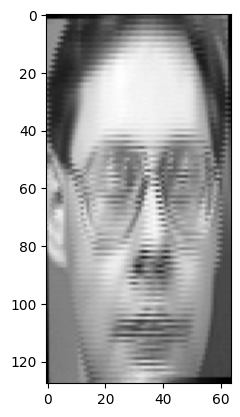

In [14]:
a = 1000
plt.imshow(x_train[a],cmap = 'gray')
print(y_train[a])

In [15]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 64, 1)))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.BatchNormalization())

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.BatchNormalization())

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 62, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 14, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 30, 14, 32)        128       
 Normalization)                                                  
                                                        

In [17]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy','mse'])

#Funcka umożliwia zatrzymanie się uczenia
#gdy wartość strat przstanie maleć
EarlyStop = EarlyStopping(monitor='val_loss',
                          verbose=1,
                          patience=10)


ModelCheck = ModelCheckpoint(filepath='/content/drive/MyDrive/Face_recognition/Real/Model_przeplatane_wiersze_1.h5',
                             monitor='val_loss',
                             save_best_only=True)

history = model.fit(x=x_train,
                    y=y_train,
                    epochs=100,
                    batch_size=128,
                    #validation_split=0.1,
                    validation_data = (x_valid, y_valid),
                    callbacks = [EarlyStop, ModelCheck]
                   )


Epoch 1/100
119/119 [==============================] - ETA: 0s - loss: 0.0319 - accuracy: 0.9589 - mse: 0.0319

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


119/119 [==============================] - 35s 174ms/step - loss: 0.0319 - accuracy: 0.9589 - mse: 0.0319 - val_loss: 0.3587 - val_accuracy: 0.5000 - val_mse: 0.3587
Epoch 2/100
119/119 [==============================] - 18s 149ms/step - loss: 0.0084 - accuracy: 0.9905 - mse: 0.0084 - val_loss: 0.4862 - val_accuracy: 0.5000 - val_mse: 0.4862
Epoch 3/100
119/119 [==============================] - 18s 153ms/step - loss: 0.0044 - accuracy: 0.9947 - mse: 0.0044 - val_loss: 0.2290 - val_accuracy: 0.5988 - val_mse: 0.2290
Epoch 4/100
119/119 [==============================] - 18s 151ms/step - loss: 0.0025 - accuracy: 0.9973 - mse: 0.0025 - val_loss: 0.2184 - val_accuracy: 0.6873 - val_mse: 0.2184
Epoch 5/100
119/119 [==============================] - 18s 153ms/step - loss: 4.9741e-04 - accuracy: 0.9996 - mse: 4.9741e-04 - val_loss: 0.1555 - val_accuracy: 0.7897 - val_mse: 0.1555
Epoch 6/100
119/119 [==============================] - 18s 150ms/step - loss: 3.1752e-04 - accuracy: 0.9997 - mse:

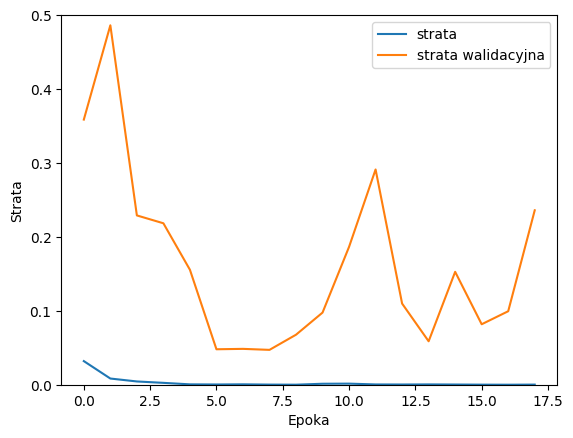

In [18]:
plt.plot(history.history['loss'], label='strata')
plt.plot(history.history['val_loss'], label = 'strata walidacyjna')
plt.xlabel('Epoka')
plt.ylabel('Strata')
plt.ylim([0.0, 0.5])
plt.legend(loc='upper right')

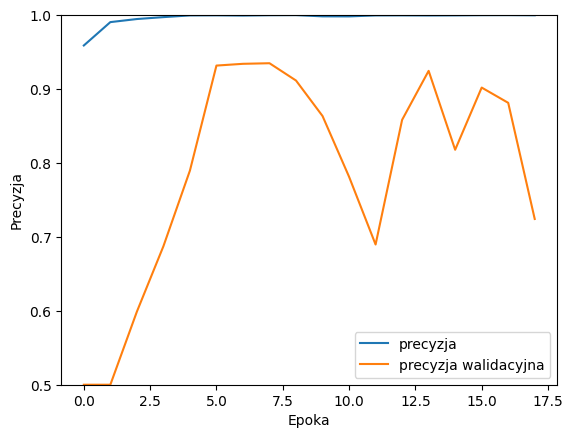

In [19]:
plt.plot(history.history['accuracy'], label='precyzja')
plt.plot(history.history['val_accuracy'], label = 'precyzja walidacyjna')
plt.xlabel('Epoka')
plt.ylabel('Precyzja')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [20]:
best_model = tf.keras.models.load_model('/content/drive/MyDrive/Face_recognition/Real/Model_przeplatane_wiersze_1.h5')


In [21]:
best_model.evaluate(x_test,  y_test, verbose=2)


79/79 - 2s - loss: 0.0826 - accuracy: 0.8925 - mse: 0.0826 - 2s/epoch - 27ms/step


[0.08263877130497947, 0.8924603174603175, 0.08263877130497947]

In [22]:
predict_x = best_model.predict(x_test)

predictions = (predict_x > 0.5).astype("int32")

79/79 [==============================] - 1s 14ms/step


In [23]:
names = [['Tn','Nn'],['Np', 'Tp']]
names = np.reshape(names,(2,2))
print(names)

conf = tf.math.confusion_matrix(y_test,predictions)

print(conf)

[['Tn' 'Nn']
 ['Np' 'Tp']]
tf.Tensor(
[[1234   26]
 [ 245 1015]], shape=(2, 2), dtype=int32)
